In [1]:
from wordcloud import STOPWORDS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The tidytext package isn't in Google Colaboratory's default list of packages, so we install it first
!pip install tidytext
import tidytext
# This library is used by tidytext for tokenization
import nltk
nltk.download('punkt')

import plotly.express as px

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 2.4 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3871 sha256=1caa8d5409b39ea99baefb5b123100359ecbbf15ae5918f60b62f2315ad98d96
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')

In [3]:
df = tidytext.unnest_tokens(GTC_V2, 'word', 'text')
df.head()

,tribunal,id_transcript,case,accused,date,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document,url,word
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...,mr
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...,president
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...,good
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...,morning
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...,everybody


In [4]:
df = df.loc[df['role']=='Accused']
df = df[['tribunal', 'word']]
df.head()

,tribunal,word
1346,ICTY,the
1346,ICTY,accused
1346,ICTY,interpretation
1346,ICTY,thank
1346,ICTY,you


In [5]:
counts = df.groupby("tribunal")["word"].value_counts()
counts

tribunal  word    
ECCC      the         1313
          i            734
          to           645
          and          630
          that         478
                      ... 
ICTY      cover          1
          crimes         1
          criminal       1
          critical       1
          crossed        1
Name: count, Length: 4713, dtype: int64

In [6]:
counts.name = "n"
counts = counts.reset_index()
counts

,tribunal,word,n
0,ECCC,the,1313
1,ECCC,i,734
2,ECCC,to,645
3,ECCC,and,630
4,ECCC,that,478
...,...,...,...
4708,ICTY,cover,1
4709,ICTY,crimes,1
4710,ICTY,criminal,1
4711,ICTY,critical,1


In [7]:
tfidf = tidytext.bind_tf_idf(counts, "word", "tribunal", "n")
tfidf

,tribunal,word,n,tf,idf,tf_idf
0,ECCC,the,1313,0.070455,0.000000,0.000000
1,ECCC,i,734,0.039386,0.000000,0.000000
2,ECCC,to,645,0.034610,0.000000,0.000000
3,ECCC,and,630,0.033806,0.000000,0.000000
4,ECCC,that,478,0.025649,0.000000,0.000000
...,...,...,...,...,...,...
4708,ICTY,cover,1,0.000030,0.693147,0.000021
4709,ICTY,crimes,1,0.000030,0.000000,0.000000
4710,ICTY,criminal,1,0.000030,0.000000,0.000000
4711,ICTY,critical,1,0.000030,0.693147,0.000021


In [8]:
tfidf = tfidf.loc[tfidf["tf_idf"] != 0]
tfidf

,tribunal,word,n,tf,idf,tf_idf
16,ECCC,s21,148,0.007942,0.693147,0.005505
63,ECCC,comrade,43,0.002307,0.693147,0.001599
72,ECCC,arrested,35,0.001878,0.693147,0.001302
82,ECCC,chan,31,0.001663,0.693147,0.001153
85,ECCC,khan,30,0.001610,0.693147,0.001116
...,...,...,...,...,...,...
4706,ICTY,counsellor,1,0.000030,0.693147,0.000021
4707,ICTY,crosses,1,0.000030,0.693147,0.000021
4708,ICTY,cover,1,0.000030,0.693147,0.000021
4711,ICTY,critical,1,0.000030,0.693147,0.000021


In [9]:
tfidf = tfidf.sort_values("tf_idf", ascending=False)
tfidf

,tribunal,word,n,tf,idf,tf_idf
16,ECCC,s21,148,0.007942,0.693147,0.005505
2308,ICTY,srebrenica,132,0.003964,0.693147,0.002748
2310,ICTY,tolimir,127,0.003814,0.693147,0.002644
63,ECCC,comrade,43,0.002307,0.693147,0.001599
2339,ICTY,map,75,0.002253,0.693147,0.001561
...,...,...,...,...,...,...
4059,ICTY,prayer,1,0.000030,0.693147,0.000021
4060,ICTY,posted,1,0.000030,0.693147,0.000021
4061,ICTY,populated,1,0.000030,0.693147,0.000021
4063,ICTY,policeman,1,0.000030,0.693147,0.000021


In [24]:
my_stop=list()
my_stop.append("chan")
my_stop.append("khan")
my_stop.append("prak")
my_stop.append("chum")
my_stop.append("chao")
my_stop.append("pon")
my_stop.append("sen")
my_stop.append("nat")
my_stop.append('seng')
my_stop.append('noring')
my_stop.append('chairman')
my_stop.append('phonetic')
my_stop.append('acknowledge')
my_stop.append('professor')
my_stop.append('norng')
my_stop.append('coinvestigating')
my_stop.append('civil')
my_stop.append('biography')

In [25]:
ECCC_tfidf=tfidf.loc[tfidf["tribunal"] == "ECCC"]
ECCC_tfidf=ECCC_tfidf.loc[~ECCC_tfidf['word'].isin(my_stop)].head(20)
ICTY_tfidf=tfidf.loc[tfidf['tribunal'] == "ICTY"].head(30)

In [26]:
ICTY_tfidf

,tribunal,word,n,tf,idf,tf_idf
2308,ICTY,srebrenica,132,0.003964,0.693147,0.002748
2310,ICTY,tolimir,127,0.003814,0.693147,0.002644
2339,ICTY,map,75,0.002253,0.693147,0.001561
2344,ICTY,column,69,0.002072,0.693147,0.001436
2356,ICTY,popovic,58,0.001742,0.693147,0.001207
2359,ICTY,wounded,51,0.001532,0.693147,0.001062
2364,ICTY,transcript,46,0.001382,0.693147,0.000958
2367,ICTY,potocari,43,0.001291,0.693147,0.000895
2375,ICTY,tuzla,39,0.001171,0.693147,0.000812
2377,ICTY,men,38,0.001141,0.693147,0.000791


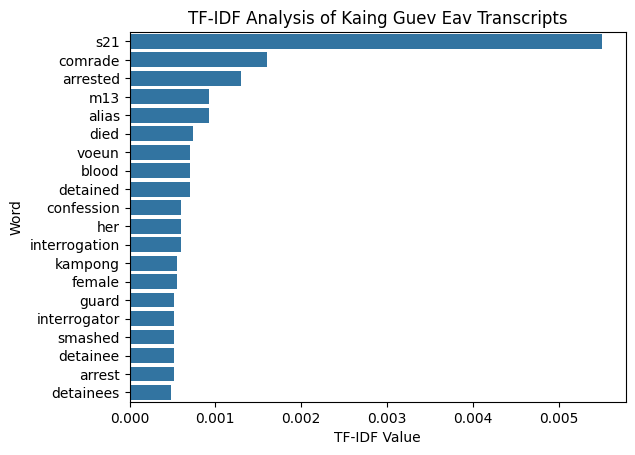

In [27]:
sns.barplot(ECCC_tfidf, x = 'tf_idf', y = 'word')
plt.xlabel('TF-IDF Value')
plt.ylabel('Word')
plt.title('TF-IDF Analysis of Kaing Guev Eav Transcripts')
plt.show()